# Data Analytics &  Machine Learning internship

Data Analytics is one of the most important and helpful factor for business growth. We can do analysis on any data using python libraries like numpy and pandas. Analyzed data can be visualized by matplotlib via various diagrams like pie chart, bar chart etc. Data Analysis is useful for decision making and machine learning model development. We will develop machine learning model using some data to predict important parameters and finds some useful insights. These insights driven that help us to take right decision according to the data. Build the machine learning model using various model building techniques like Linear Regression , Classification etc.

## Project title :)
# **Exploratory Data Analysis of Medical Cost**

Data analysis is all about answering questions with data. Exploratory data analysis, or EDA for short, helps you explore what questions to ask.

Medical cost based on the smoking habit , weight , BMI ( Body mass index) etc and classify by the region , age , gender etc.


Data-set Name : [insurance.csv](https://https://www.kaggle.com/datasets/mirichoi0218/insurance)




# 1. READING THE DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

* Imorting the data-set 

In [ ]:
data=pd.read_csv('insurance.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. DATA CLEANING AND FORMATTING 

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info(max_cols=len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# ::)  Working with missing , incorrent and invaild data 

### Missing, incorrect, and invalid data need to be addressed to avert possible misleading mathematical operations. There are pandas functions, for example mean(), that exclude NaN values by default; however, other numerical operations consider all values, including missing values, to perform those operations. This will lead to wrong results. Incorrect and invalid data will also result in wrong outcomes. For these reasons, it is vital to tackle these different types of data according to their case.



## ==>Missing Values (NaN)



### If we take a look at the number of non-null elements of each column we can see that all columns have 1338 count that means no missing values in dataset.

But Also we verify that missing value there or not?

In [ ]:
data.isna().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Here , We can see that our dataset's columns not have any missing values. 

# ==> Invaild Values

### New Now let's check if the data frame contains invalid values. These values can be more dangerous than missing values because errors in operation results can be tricky to identify. First, we can try to find out if the data frame has negative values.


To perform this, we need to identify which columns contain numerical values. Only those columns will be assessed.

In [ ]:
col_list=data.select_dtypes(include=['float64','int64']).columns
print('Numerical type columns : {} '.format(col_list))
li_st=list()
for i in col_list:
    y=any(x < 0 for x in data[li_st])
    if y==True:
        li_st.append(y)
print('There are {} negative values in the data frame.'.format(len(li_st)))

Numerical type columns : Index(['age', 'bmi', 'children', 'charges'], dtype='object') 
There are 0 negative values in the data frame.


Therefore, for this dataset, we do not need to be handling negative invalid values.

# ==> Inconsistent values

## Let's View the dataset by describe to check the is there inconsistent values or not ?

## And also, find the total number of entries with 0 value.



In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:

total_zero=(data[data.loc[0:]==0]).count().sum()
total_zero_child=(data['children']==0).count().sum()
print('These data contains {} zero values.'.format(total_zero))
print('These children column data contains {} zero values.'.format(total_zero))


These data contains 574 zero values.
These children column data contains 574 zero values.


### In the specific case of this data set, the entries with a zero value that only in children column and that is possible can any person has no child and he or she suffering any diseaes and charge medical cost. 

### Therefore , no need to handle that type of entries.

# ==> Giving Format

### Now, in order to use the column names as properties or meaningful and take advantage of it, it's necessary to remove some special characters that some column names contain, but these dataset not have any special charactors in column's name and also names are meaningful as properties.

# 3. Exploratory Data Analysis (EDA) and Visualization.

To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are. In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works.



In [ ]:
from IPython.display import display
with pd.option_context('display.max_columns',None):
  display(data.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As we can see that higher age people have higher medical charges or cost.

So , Let's see which age's people get the hightest amount of charges.

In [ ]:
high_charges=data[['age','charges']].groupby('age').max()
print(high_charges)
gp=pd.DataFrame(data[['age']].groupby('age'))
print(high_charges['charges'].values)
max=high_charges['charges'].values
gp['Max charges']=max
gp
new_gp=pd.DataFrame(gp[[0]])
new_gp['Max charges']=max
new_gp.rename(columns={0:'Age'},inplace=True)
new_gp
# print(high_charges[high_charges.age==18].sort_values('charges',ascending=False))
# gp.max()

         charges
age             
18   38792.68560
19   39722.74620
20   38344.56600
21   26018.95052
22   44501.39820
23   40904.19950
24   38126.24650
25   42112.23560
26   36085.21900
27   39611.75770
28   51194.55914
29   44585.45587
30   40932.42950
31   58571.07448
32   37607.52770
33   55135.40209
34   43943.87610
35   39983.42595
36   43753.33705
37   46113.51100
38   41949.24410
39   40103.89000
40   40003.33225
41   40273.64550
42   43896.37630
43   45863.20500
44   48885.13561
45   62592.87309
46   46151.12450
47   44202.65360
48   45702.02235
49   39727.61400
50   42856.83800
51   47462.89400
52   60021.39897
53   46661.44240
54   63770.42801
55   44423.80300
56   43921.18370
57   48675.51770
58   47496.49445
59   48970.24760
60   52590.82939
61   48517.56315
62   46718.16325
63   48824.45000
64   49577.66240
[38792.6856  39722.7462  38344.566   26018.95052 44501.3982  40904.1995
 38126.2465  42112.2356  36085.219   39611.7577  51194.55914 44585.45587
 40932.4295  58571.074

,Age,Max charges
0,18,38792.68560
1,19,39722.74620
2,20,38344.56600
3,21,26018.95052
4,22,44501.39820
5,23,40904.19950
6,24,38126.24650
7,25,42112.23560
8,26,36085.21900
9,27,39611.75770


# Data Visualization

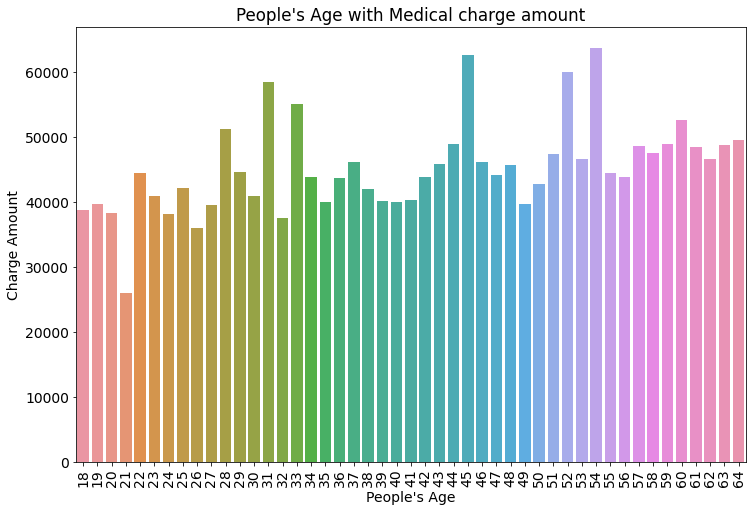

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='Age',y='Max charges',data=new_gp)
plt.title("People's Age with Medical charge amount")
plt.xlabel("People's Age")
plt.ylabel('Charge Amount')
plt.xticks(rotation=90);

See the above figure of people's age with charge amount , We can see that age of 40 plus people medical cost charges are higher.

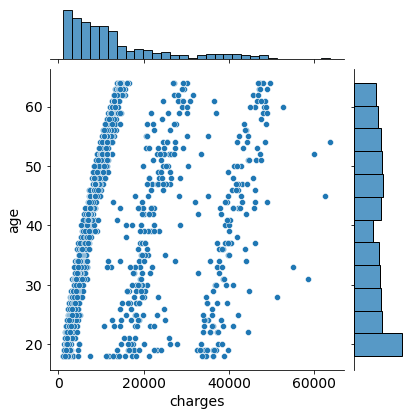

In [ ]:
sns.jointplot(x='charges',y='age',data=data,kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

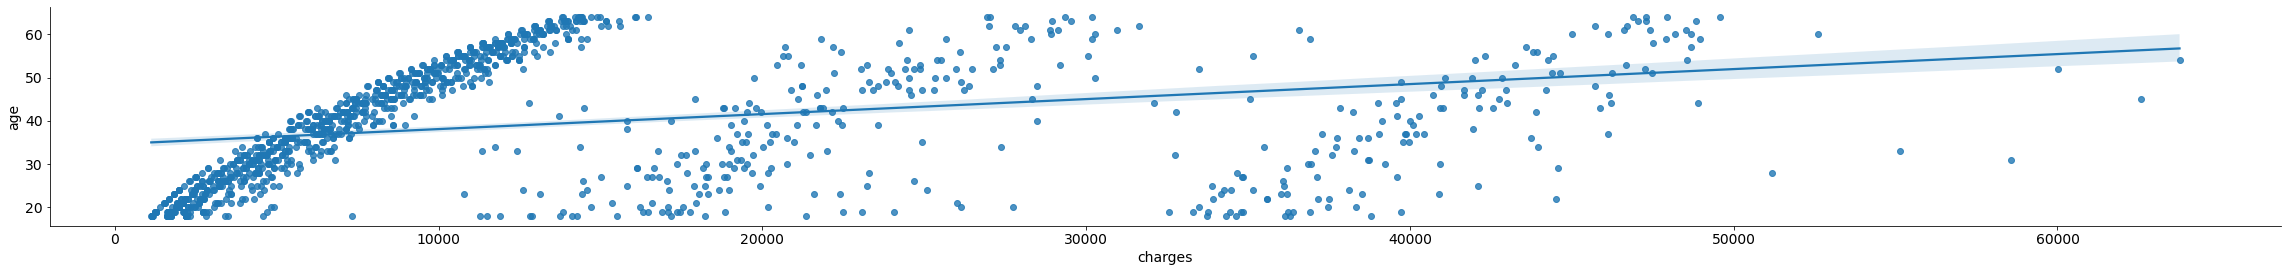

In [ ]:
plt.figure(figsize=(20,10))
sns.lmplot(x='charges',y='age',size=4,aspect=8,data=data)

After look at these figure , we can see that as much as number of age increases medical charges increases.

According to dataset at age of 54 medical charges 63770.42801 this much And at age of 18 medical charges 1121.87390.

Here, taking about medical charges amount , we will find lower numbers when comapared to the low age. That happens because normal people age 18 to 30 that have good healthly body & immunity power and as age increasing immunity power less. 

For now, we have closely-related questions:

## Qes: Has a high medical charges of higher age people group?

## Qes: Has a low medical charges of lower age people group?

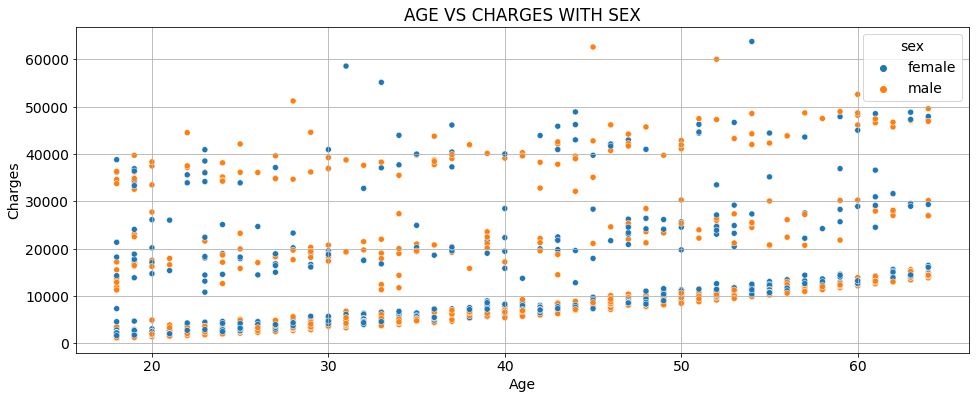

In [ ]:
plt.figure(figsize=(16,6))
plt.title('AGE VS CHARGES WITH SEX')
sns.scatterplot(y=data.charges,x=data.age,hue=data.sex)
plt.ylabel('Charges')
plt.xlabel('Age')
plt.grid()

If we look at the above figure , we can see that, with few execeptions, male of higher age that have higher medical charges compare to female of higher age.

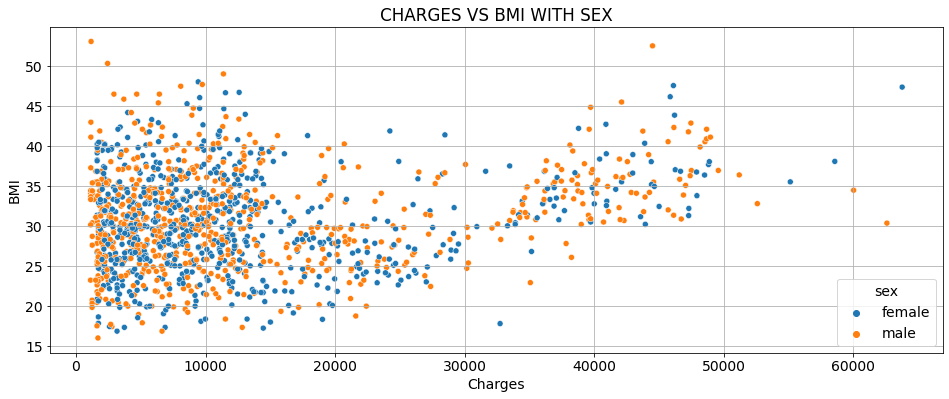

In [ ]:
plt.figure(figsize=(16,6))
plt.title('CHARGES VS BMI WITH SEX')
sns.scatterplot(y=data.bmi,x=data.charges,hue=data.sex)
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.grid()

If we look at above figure carefully , we can see that, higher BMI of male that lead the small medical charges compare to female of higher BMI.

Also, we can see that , 20 to 35 BMI that have less medical charges.

Now, We can see that, count of smoker via below figure :

Text(0.5, 1.0, 'Count of smoker')

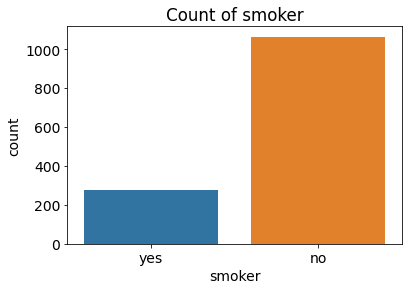

In [ ]:
sns.countplot(x='smoker',data=data)
plt.title('Count of smoker')


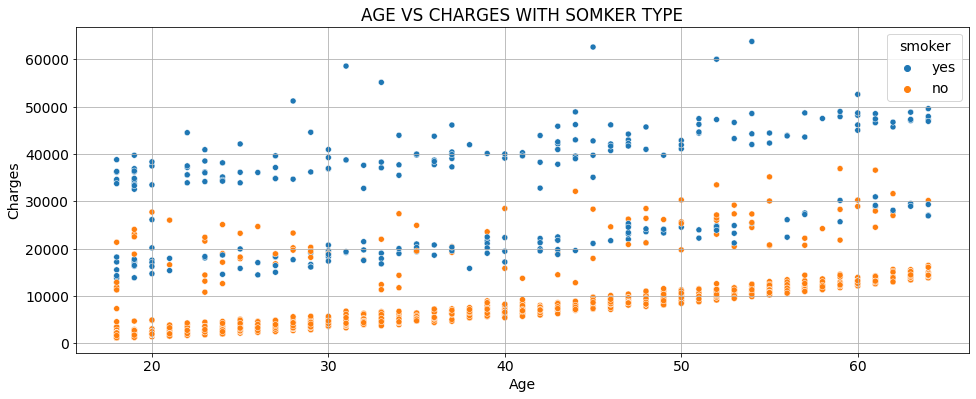

In [ ]:
plt.figure(figsize=(16,6))
plt.title('AGE VS CHARGES WITH SOMKER TYPE')
sns.scatterplot(y=data.charges,x=data.age,hue=data.smoker)
plt.ylabel('Charges')
plt.xlabel('Age')
plt.grid()

As, We look at the above figure of AGE VS CHARGES as hue = smoker ,according this figure we can see that smoker person irrespetive to male or female any age group have higher medical charges , and we can also say that not smoker person has less medical charges.  

Above figure we can see that, as age was increases smoker person medical charges also increases.

      smoker
0          1
1          0
2          0
3          0
4          0
...      ...
1333       0
1334       0
1335       0
1336       0
1337       1

[1338 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Smoker count')

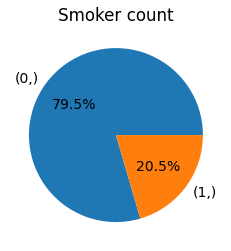

In [ ]:
smoker_data=data[['smoker']]
smoker_data['smoker']=smoker_data['smoker'].replace(['yes','no'],[1,0])
print(smoker_data)
count=smoker_data.value_counts()
plt.pie(count,autopct='%.1f%%',labels=count.index)
plt.title("Smoker count")

As we can see that from this figure is majority people are not smoker that means , we can predict that it is lead minimum medical cost charges.

Text(0, 0.5, 'Count')

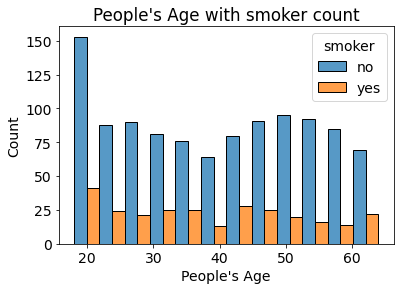

In [ ]:
age_data=data[['age','smoker']].sort_values('age')
sns.histplot(x="age",hue="smoker",data=age_data,multiple="dodge")
plt.title("People's Age with smoker count")
plt.xlabel("People's Age")
plt.ylabel('Count')

If we look at above figure , we can see that at under 20 age higher number of smoker count are compare to other age groups like 30 to 40 and 50 to 60.

Text(0, 0.5, 'Count')

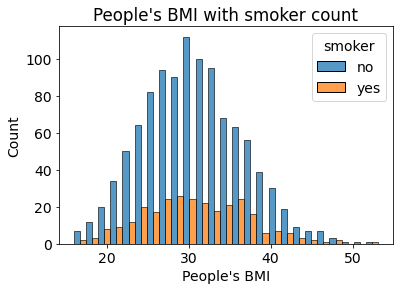

In [ ]:
bmi_data=data[['bmi','smoker']].sort_values('bmi')
sns.histplot(x="bmi",hue="smoker",data=bmi_data,multiple="dodge")
plt.title("People's BMI with smoker count")
plt.xlabel("People's BMI")
plt.ylabel('Count')

As we look at the above figure of people's BMI with smoker count , we can see that non-smoker person has good BMI index compare to smoker person also count of non-smoker with good body mass index very high.

This figure also show that very small count of person that have very high BMI index irrespective to the smoker or non-smoker. That show that good healthy person has a medium BMI index.

Text(0, 0.5, 'Count')

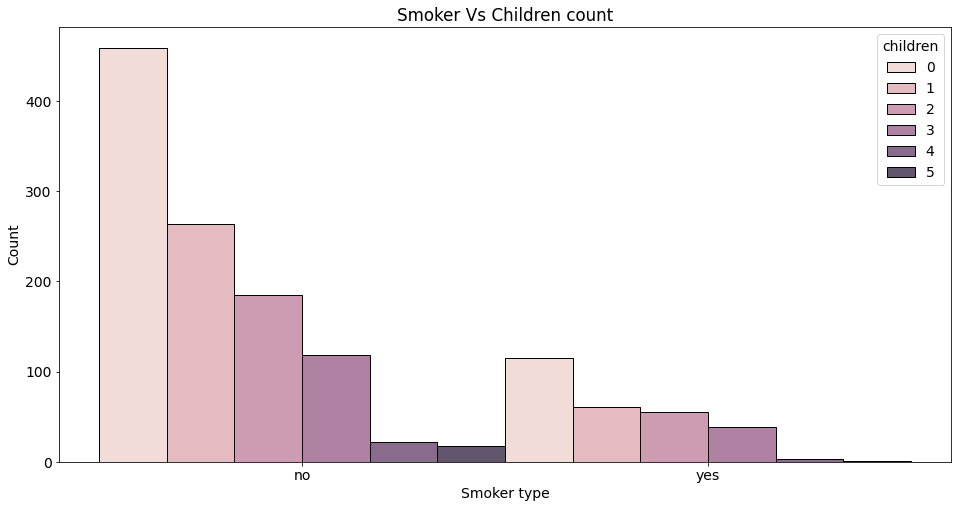

In [ ]:
plt.figure(figsize=(16,8))
bmi_child_data=data[['bmi','smoker','children']].sort_values('smoker')
sns.histplot(x="smoker",hue="children",data=bmi_child_data,multiple="dodge")
plt.title("Smoker Vs Children count")
plt.xlabel("Smoker type")
plt.ylabel('Count')

As we can see from above figure that some abnormal infomation like count of non-smoker person has 0 child very big and count of smoker person has 0 child is less compare to non-smoker.

But in these figure we can see that count of non-smoker person has 5 child in bigger than count of smoker has 5 child.

Text(0, 0.5, 'Count')

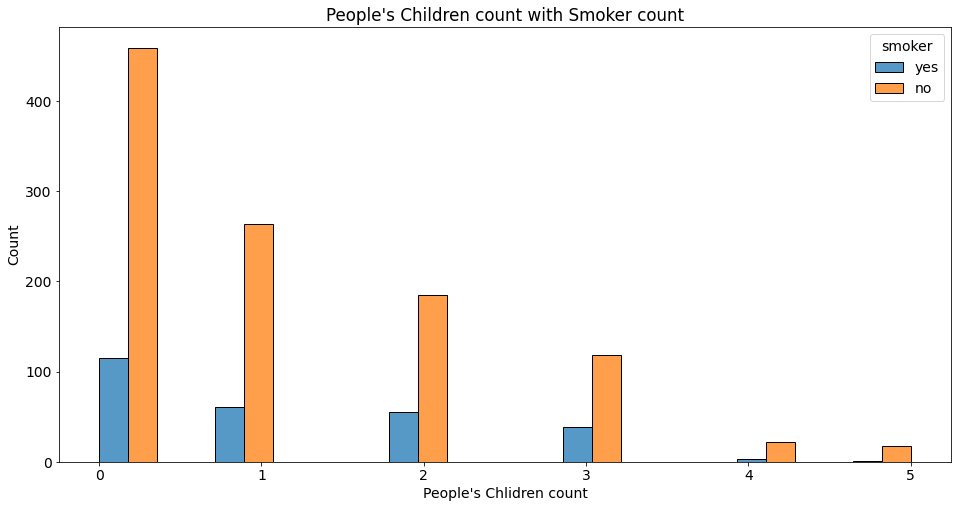

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(x="children",hue="smoker",data=data,multiple="dodge")
plt.title("People's Children count with Smoker count")
plt.xlabel("People's Chlidren count")
plt.ylabel('Count')

After look at the above figure ,we can see that smoker and non-smoker person has big chance to not have children or 0 children. 
These happence behind not only one reason may have smoking habit , but only smoking habit can not affect the children count ,but any other factor can also affects.

Text(0.5, 1.0, 'Region wise Smoker with Medical charges')

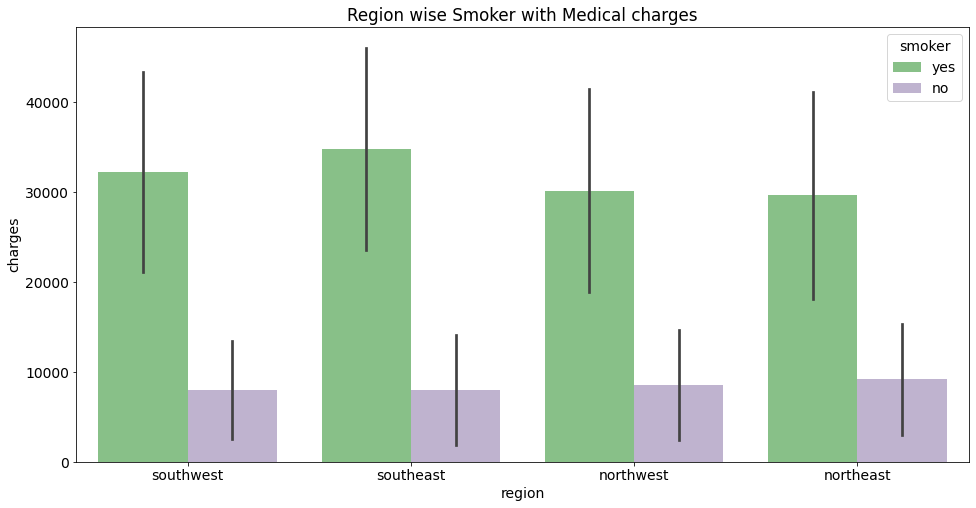

In [ ]:
plt.figure(figsize=(16,8))
region_data=data[['region','charges','smoker']].sort_values('region')
sns.barplot(x='region',y='charges',data=data,hue='smoker',ci="sd",palette='Accent')
plt.title("Region wise Smoker with Medical charges")


This image displays several characteristics, like region wise smoker's medical charges. In this case of dataset 4 regions are there southwest , southeast , northwest , northeast . In these regions highest smoker and hightest medical charges cases are in southeast region and in this region non-smoker person is count also very less.  

So that we can see that less number of smoker in northeast region and also that have less medical charges compare to other region. 

Text(0.5, 1.0, 'Age and Region wise Medical charges')

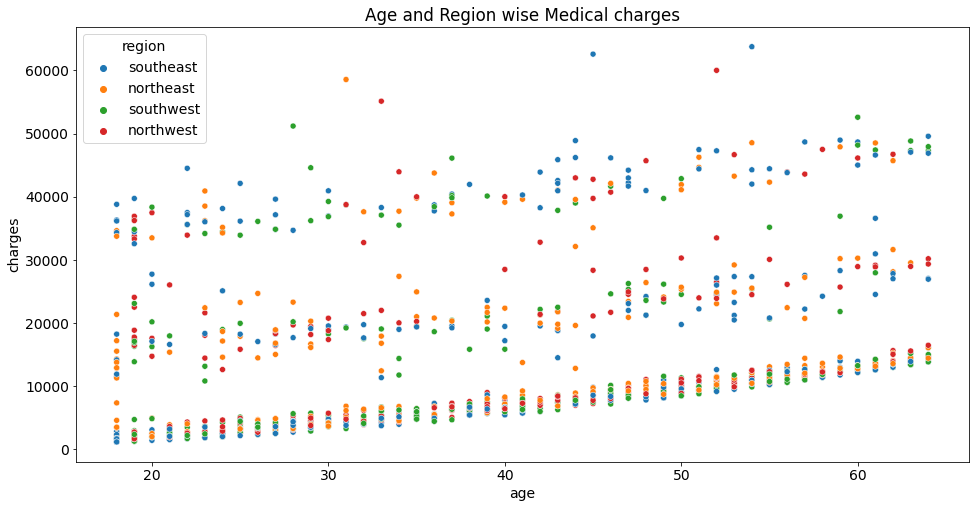

In [ ]:
plt.figure(figsize=(16,8))
age_region=data[['age','charges','region']].sort_values('age')
sns.scatterplot(y=age_region.charges,x=age_region.age,hue=age_region.region)
plt.title("Age and Region wise Medical charges")

After looking above figure carefully ,We can see that majority of  medical charges at 20 to 45 age group has medical cost charges under 10000 only irrespective to region. We can also see that majority of southeast region people has higher medical cost of all age groups because above we see that southeast region has big count of smoker.

SW : 58,SE : 91,NE : 67,NW : 58
(58, 91, 67, 58)


Text(0.5, 1.0, 'Highest Smoker in Region')

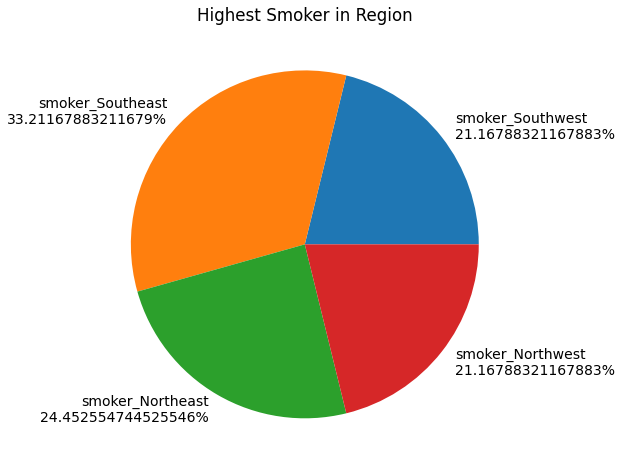

In [ ]:
smoker_region=data[['smoker','region']]
smoker_SW=0
smoker_SE=0
smoker_NE=0
smoker_NW=0
count=[]
for i in range(0,len(smoker_region['region'])):
  if smoker_region['smoker'][i]=='yes':
    if(smoker_region['region'][i]=='southwest'):
      smoker_SW+=1
    elif smoker_region['region'][i]=='southeast':
      smoker_SE+=1
    elif smoker_region['region'][i]=='northeast':
      smoker_NE+=1
    else :
      smoker_NW+=1


print('SW : {},SE : {},NE : {},NW : {}'.format(smoker_SW,smoker_SE,smoker_NE,smoker_NW))
count=smoker_SW,smoker_SE,smoker_NE,smoker_NW
print(count)

def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

plt.figure(figsize=(16,8))
plt.pie(count,labels=['smoker_Southwest\n'+str(percentage(58,274)),'smoker_Southeast\n'+str(percentage(91,274)),'smoker_Northeast\n'+str(percentage(67,274)),'smoker_Northwest\n'+str(percentage(58,274))])
plt.title('Highest Smoker in Region')


After look at the this image of highest smoker in region wise , we can find some pattern like south-West region's smoker people rate is high. so, therefore we can note that this South-West region's people medical charges also higher.

Also this chart show that , less number of count of smoker are belonging from Northwest that percentage is 21.1678%

# Conclusion



*    A higher age of people has a higher medical cost charges. According to data We can say that age of 40+ people's medical cost charges are higher.
*   By analyzing the gender rate with age and medical charges ,we can say that, with few execeptions, male of higher age that have higher medical charges compare to female of higher age.



*   After analyzing data of BMI (Body Mass Index ) with medical charges, we can say that, higher BMI index of male or female that lead the small or medium cost of medical charges. Also, we can say that , 20 to 35 BMI that have less medical charges.

*    In analyses made to find a pattern about medical cost charges for smokers,  we found that smoker person irrespetive to male or female any age group have higher medical cost charges , and we  also found that not smoker person has very less medical cost charges.


*    After analyzing and studing this dataset, We found that count of smoker people is less than count of non-smoker. These show that big number of people konws that cons of smoking and that leads medical cost charges because smoking is harmful for body.

*    As we find from data that at under 20 age higher number of smoker that means around 20 age higher risk that person involve in smoking.

*   When we made analyses of BMI index with smoking habit to find a pattern that non-smoker person has good BMI index compare to smoker person also count of non-smoker with good body mass index very high. That represent that non-smoker has good healthy body that also have benefits in medical cost charges.

*    The non-smoker person has high chance of big number of children compare to smoker if he/she wants. Because they have healthy body and less chance in complication child borning. 

*   When looking region wise data analyses,We found that highest smoker and medical cost charges cases are come in from southeast region and also in this region non-smoker person is count also very less. Also we found that less number of smoker in northeast region . So we can say that Southeast region people has big medical cost charges , smoker, high chance of no-child these because un-healthy body structure and mainly smoking habit.

# Future Work

*    A possible future work could make a similar analysis but making a stronger consideration about how the smoking , drinking alcohal , taking drugs etc. these habits how affects the healthy body, arising various diseases , mental illness , destory the family's relationships , increase loss in profession and many more elements.

*   It could also be find the death and recovery rate of various bad habits that data helpful to find any insurance company provides insurance or not to these of people that expands the dataset and increase accurace of analysis. 


# References

*   https://www.kaggle.com/datasets/mirichoi0218/insurance 

*   https://jovian.ai/danycg85/analysis-of-american-universities-nw/v/32?utm_source=embed

*   https://www.coursera.org/articles/data-analytics-projects-for-beginners

# Model Building

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [176]:
# Taking dataset Which dataset that we already pre=processed is done in EDA
data.to_csv('medical_cost.csv')
medical_data=data
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Linear Regression Model
# here, we predicting medical charges base on BMI Index and Smoker type

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
x=pd.DataFrame(medical_data[['bmi','age','smoker']])
x['smoker']=x['smoker'].replace({'yes':1,'no':0})
print(x.head())
y=pd.DataFrame(medical_data[['charges']])

      bmi  age  smoker
0  27.900   19       1
1  33.770   18       0
2  33.000   28       0
3  22.705   33       0
4  28.880   32       0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
print(len(x_train))
print(len(x_test))

1070
268


In [ ]:
lr =LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(x_test)
print('Predicted values : '+str(y_predict[:5]))
print('Tested values'+str(y_test.head()))

Predicted values : [[ 2114.96540752]
 [12128.48900504]
 [10103.64805352]
 [ 2615.25978845]
 [ 6793.23791918]]
Tested values          charges
17     2395.17155
1091  11286.53870
273    9617.66245
270    1719.43630
874    8891.13950


In [ ]:
# Linear Regression Model Accuracy

lr_acur=lr.score(x_test,y_test)
print('Linear Regression model accuracy : {}%'.format(lr_acur*100))

Linear Regression model accuracy : 74.58235577888375%


In [ ]:
# Polynomial Linear Regression Model

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
x_poly=pd.DataFrame(medical_data[['bmi','age','smoker']])
x_poly['smoker']=x_poly['smoker'].replace({'yes':1,'no':0})
print(x_poly.head())
y_poly=pd.DataFrame(medical_data[['charges']])

      bmi  age  smoker
0  27.900   19       1
1  33.770   18       0
2  33.000   28       0
3  22.705   33       0
4  28.880   32       0


In [ ]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly,y_poly, test_size=0.2, random_state=2)
print(len(x_train_poly))
print(len(x_test_poly))

1070
268


In [ ]:
poly=PolynomialFeatures(degree=4)
x_train_poly_trans, x_test_poly_trans=poly.fit_transform(x_train_poly) , poly.fit_transform(x_test_poly)
print(x_train_poly_trans[:5])
print(x_train_poly.head())

[[1.00000000e+00 2.21350000e+01 2.10000000e+01 0.00000000e+00
  4.89958225e+02 4.64835000e+02 0.00000000e+00 4.41000000e+02
  0.00000000e+00 0.00000000e+00 1.08452253e+04 1.02891227e+04
  0.00000000e+00 9.76153500e+03 0.00000000e+00 0.00000000e+00
  9.26100000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.40059062e+05 2.27749732e+05 0.00000000e+00 2.16071577e+05
  0.00000000e+00 0.00000000e+00 2.04992235e+05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.94481000e+05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.08750000e+01 3.70000000e+01 0.00000000e+00
  9.53265625e+02 1.14237500e+03 0.00000000e+00 1.36900000e+03
  0.00000000e+00 0.00000000e+00 2.94320762e+04 3.52708281e+04
  0.00000000e+00 4.22678750e+04 0.00000000e+00 0.00000000e+00
  5.06530000e+04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.08715352e+05 1.08898682e+06 0.00000000e+00 1.30502064e+06
  0.00000000e+00 0.00000000e+00 1.56391138e+06 0.00000000e+00
  0.00000000e+00 0.000

In [ ]:
poly_model=LinearRegression()
poly_model.fit(x_train_poly_trans,y_train_poly)

LinearRegression()

In [ ]:
y_predict_poly=poly_model.predict(x_test_poly_trans)
print(' Preducted values : '+str(y_predict_poly[:5]))
print('Test values :'+str(y_test_poly.head()))

 Preducted values : [[ 4416.9200134 ]
 [13146.21119964]
 [10865.8048287 ]
 [ 3569.29665995]
 [ 8312.98243557]]
Test values :          charges
17     2395.17155
1091  11286.53870
273    9617.66245
270    1719.43630
874    8891.13950


In [ ]:
# Poly Linear Regression Model Accuracy

poly_acur=poly_model.score(x_test_poly_trans,y_test_poly)
print('Polynomial Linear Regression model accuracy : {}%'.format(poly_acur*100))

Polynomial Linear Regression model accuracy : 85.77605797274647%


In [ ]:
# Decision Tree Regression Model

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
x_dt=pd.DataFrame(medical_data[['bmi','age','smoker']])
x_dt['smoker']=x_dt['smoker'].replace({'yes':1,'no':0})
print(x_dt.head())
y_dt=pd.DataFrame(medical_data[['charges']])

      bmi  age  smoker
0  27.900   19       1
1  33.770   18       0
2  33.000   28       0
3  22.705   33       0
4  28.880   32       0


In [ ]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt,y_dt, test_size=0.2, random_state=0)
print(len(x_train_dt))
print(len(x_test_dt))

1070
268


In [ ]:
dt_model =DecisionTreeRegressor(random_state=50)
dt_model.fit(x_train_dt, y_train_dt)

DecisionTreeRegressor(random_state=50)

In [ ]:
y_predict_dt=dt_model.predict(x_test_dt)
print('Predicted values : '+str(y_predict_dt[:5]))
print('Tested values'+str(y_test_dt.head()))

Predicted values : [10797.3362   8930.93455 44202.6536  15230.32405  9264.797  ]
Tested values          charges
578    9724.53000
610    8547.69130
569   45702.02235
1034  12950.07120
198    9644.25250


In [ ]:
# Decision Tree Regression Model Accuracy

dt_acur=dt_model.score(x_test_dt,y_test_dt)
print('Decision Tree Regression model accuracy : {}%'.format(dt_acur*100))

Decision Tree Regression model accuracy : 73.33716572533129%


In [ ]:
# Random Forest Regression Model

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x_rf=pd.DataFrame(medical_data[['bmi','age','smoker']])
x_rf['smoker']=x_rf['smoker'].replace({'yes':1,'no':0})
print(x_rf.head())
y_rf=pd.DataFrame(medical_data[['charges']])

      bmi  age  smoker
0  27.900   19       1
1  33.770   18       0
2  33.000   28       0
3  22.705   33       0
4  28.880   32       0


In [ ]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf,y_rf, test_size=0.2, random_state=0)
print(len(x_train_rf))
print(len(x_test_rf))

1070
268


In [ ]:
rf_model =RandomForestRegressor(random_state=2)
rf_model.fit(x_train_rf, y_train_rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=2)

In [ ]:
y_predict_rf=rf_model.predict(x_test_rf)
print('Predicted values : '+str(y_predict_rf[:5]))
print('Tested values'+str(y_test_rf.head()))

Predicted values : [11030.5017627 10777.1353025 44514.4013602 14460.3726277  9378.7427945]
Tested values          charges
578    9724.53000
610    8547.69130
569   45702.02235
1034  12950.07120
198    9644.25250


In [ ]:
# Random Forest Regression Model Accuracy

rf_acur=rf_model.score(x_test_rf,y_test_rf)
print('Random Forest Regression model accuracy : {}%'.format(rf_acur*100))

Random Forest Regression model accuracy : 86.0820176679652%


After , Building various Machine Learning Models are Linear Regression , Polynomial Linear Regression , Decision Tree and Random Forest . We find accuracy of each model , in which we can see that Random Forest Regression Model has higher accuracy compare to other models. So we can say that Random Forest Machine Learning Model is best fit for our data predictions. 

In [ ]:
# Thank you for viewing...